In [363]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [364]:
m = 113.44
x = 300 * random.rand(30_000)
c = 3000

y = m*x + c

max = 4606

In [365]:
y

array([34240.16867808, 30403.33820139, 15502.1185039 , ...,
       27208.045409  , 14677.43775103, 15320.87008235])

In [366]:
y_inacc = []
r_inacc = []
i = 300
while i < 30_000:
    r = np.random.normal(0,1)
    temp = y[i] + (max)*r
    y_inacc.append(temp)
    r_inacc.append(r)
    i += 1

In [367]:
y_inacc = np.array(y_inacc)

In [368]:
y_inacc

array([ 7090.58114047, 14830.83629589, 23367.64619443, ...,
       30780.50814987, 17708.03134046, 18264.40305563])

In [369]:
len(y_inacc)

29700

In [370]:
y = y[:-29700]
len(y)

300

In [371]:
y = np.concatenate((y, y_inacc))
y

array([34240.16867808, 30403.33820139, 15502.1185039 , ...,
       30780.50814987, 17708.03134046, 18264.40305563])

In [372]:
len(y)

30000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


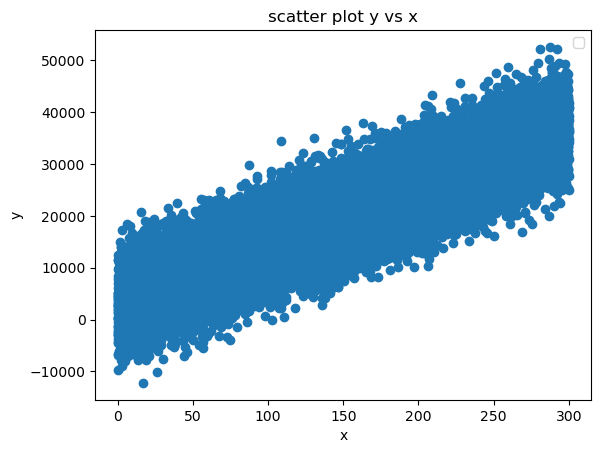

In [373]:
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('scatter plot y vs x')

plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

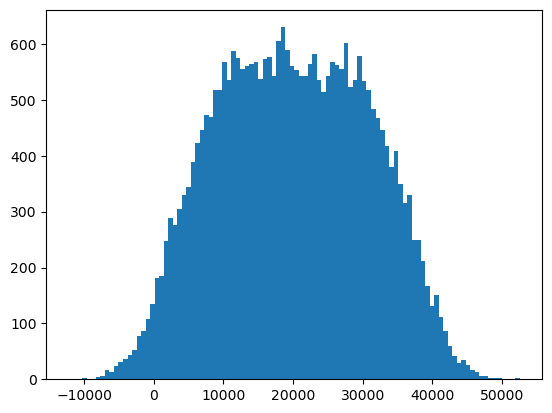

In [374]:
plt.hist(y_inacc,100)
plt.show

NOW REGRESSION TIME
===

In [375]:
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                    test_size=0.25,
                                                    random_state=0)

print('Train size : ', x_train.shape)
print('Test size  : ', x_test.shape)

Train size :  (22500,)
Test size  :  (7500,)


In [376]:
x_train

array([ 98.70955337, 283.4137875 ,   8.90320409, ...,  27.36129942,
       107.82314687,   8.91985148])

In [377]:
x_train = x_train.reshape(-1, 1)

In [378]:
x_train

array([[ 98.70955337],
       [283.4137875 ],
       [  8.90320409],
       ...,
       [ 27.36129942],
       [107.82314687],
       [  8.91985148]])

Method 3: Scikit-Learn

In [379]:
linear_regression = LinearRegression()
linear_regression.fit(x_train,y_train)

print("formula from regression is: ")
print("y = ", linear_regression.coef_, "x + ", linear_regression.intercept_)
print("original: ")
print("y = ", m, "x + ", c)

formula from regression is: 
y =  [113.30063361] x +  3023.2080426237444
original: 
y =  113.44 x +  3000
